# House Sales in King County, USA


This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
%matplotlib inline

# Importing Data Sets


In [108]:
df = pd.read_csv('kc_house_data_NaN.csv')

In [109]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503




Displaying the data types of each column using the function dtypes

In [110]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Statistical summary of the dataframe :


In [111]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Wrangling / Exploratory Data Analysis


Changing the price column to type int

In [112]:
#df['price'] = df['price'].astype(int)

Dropping the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 , then using the method <code>describe()</code> to obtain a statistical summary of the data :

In [113]:
df = df.drop(["id","Unnamed: 0"], axis = 1)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can see if we have any duplicated rows 

In [114]:
df.duplicated().sum()

0

We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [115]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> 

In [116]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> 

In [117]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [118]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


Getting value counts for <code>'floors'</code>

In [119]:
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Determining if the feature <code>sqft_above</code> is negatively or positively correlated with price.


<Axes: xlabel='sqft_above', ylabel='price'>

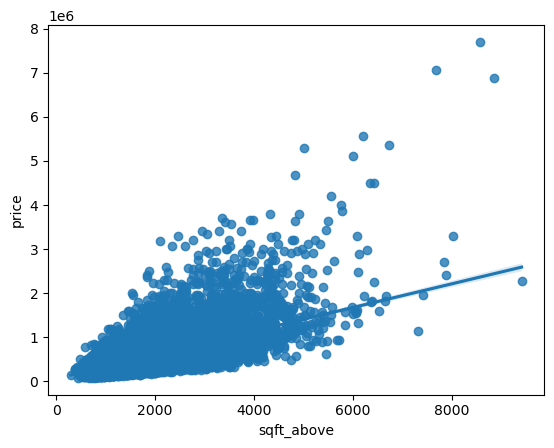

In [120]:
sns.regplot(x = "sqft_above", y = "price", data = df)
# Positive correlation

### Finding the feature other than price that is most correlated with price.


In [121]:
df.corr()['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525738
view             0.397293
sqft_basement    0.323816
bedrooms         0.308797
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

# Questions for Dataset

### 1. What is the average sale price of houses in King County?

In [122]:
df['price'].mean()

540088.1417665294

The average price for a home is roughly $540,088

### 2. How does the number of bedrooms affect the sale price of a house?

In [123]:
bed_price = df.groupby('bedrooms')['price'].mean().astype(int)
bed_price

bedrooms
1.00000      317642
2.00000      401372
3.00000      466232
3.37287      409503
4.00000      635419
5.00000      786599
6.00000      825520
7.00000      951184
8.00000     1105076
9.00000      893999
10.00000     819333
11.00000     520000
33.00000     640000
Name: price, dtype: int32

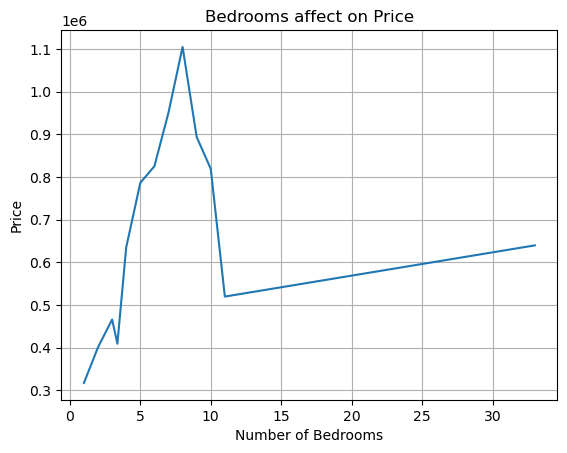

In [124]:
plt.plot(bed_price.index,bed_price.values)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms affect on Price')
plt.grid()
plt.show()

We can see that as the number of bedrooms increase to 8, the price also increases but this isn't true after 8 bedrooms as the price takes a massice drop after 8 bedrooms and slowly rises as we increase the bedrooms.

### 3. Is there a correlation between square footage of living space and sale price?

<Axes: xlabel='sqft_living', ylabel='price'>

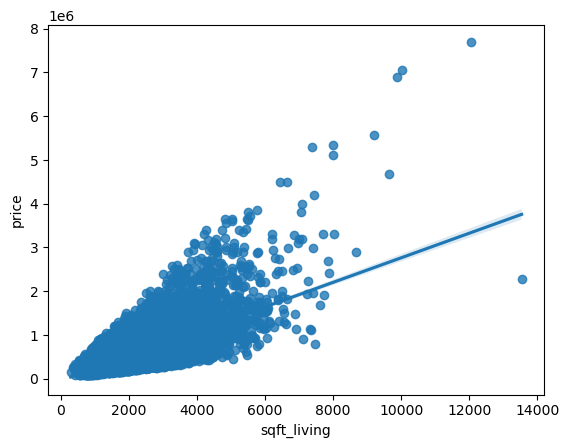

In [125]:
sns.regplot(x = df['sqft_living'], y = df['price'])

In [126]:
df.corr()['price']['sqft_living']

0.7020350546118005

There does seem to be a positive correlation between living space and sale price.

### 4. How do waterfront properties differ in price compared to non-waterfront properties?

<Axes: xlabel='waterfront', ylabel='price'>

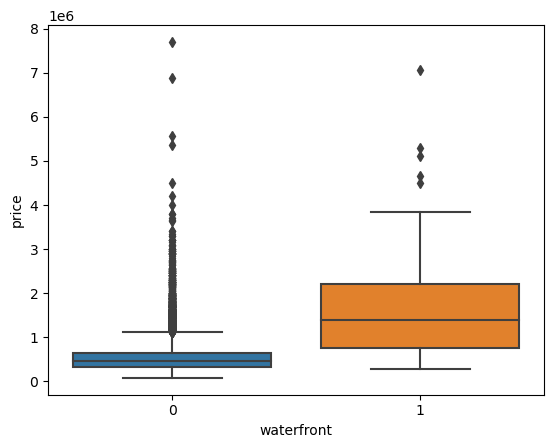

In [127]:
sns.boxplot(x = df['waterfront'] , y = df['price'])

We can see that homes with a waterfront tend to have a higher price although there are many outliers of houses with no waterfront and high prices.

### 5. What is the relationship between the number of times a house has been viewed and its sale price?

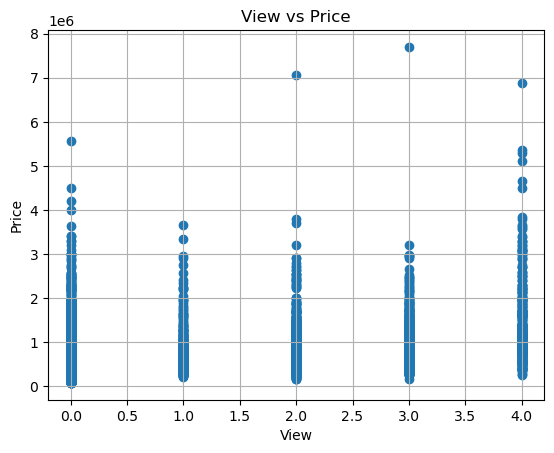

In [128]:
plt.scatter(df['view'], df['price'])

plt.xlabel('View')
plt.ylabel('Price')
plt.title('View vs Price')

plt.grid()
plt.show()

There does not seem to be a relationship between the number of times a house has been viewed and the sale price. Realistically we would expect the more expensive houses to be viewed less but this is not clear from our data.

# Hypothesis Testing

<b>Our Hypothesis</b> :  Houses with more bedrooms have higher sale prices. We want to test this from the results of <a href="#2.-How-does-the-number-of-bedrooms-affect-the-sale-price-of-a-house?">Question 2</a>

In this case, since we are comparing the means of two or more groups (houses with different numbers of bedrooms), we could use an ANOVA (Analysis of Variance) test.


To interpret the results: If the p-value is less than our chosen significance level (e.g., 0.05), we can reject the null hypothesis (which usually states that there is no relationship between the variables). In this case, a low p-value would suggest that the number of bedrooms is significantly associated with the sale price of a house.

This is just one example of a hypothesis we could test. we may want to explore other relationships within the dataset or use different statistical tests based on our specific hypothesis.


In [129]:
# Grouping the data by the number of bedrooms and creating a list of sale prices for each group
bedroom_groups = df.groupby('bedrooms')['price'].apply(list)

# Performing ANOVA test
f_statistic, p_value = stats.f_oneway(*bedroom_groups) # "*"" used for unpacking

print("F-statistic:", f_statistic)
print("P-value: {:.10f}".format(p_value))


F-statistic: 214.62657916834175
P-value: 0.0000000000


We reject $H_o$ and can conclude that there is a statistical relationship between the variables (bedrooms and price).

This test suggests that the number of bedrooms is significantly associated with the sale price of a house

# Model Development


## Testing

We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the $R^2$.


In [130]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

A poor regression model is excpected as <code>'long'</code> was not correlated with <code>'price'</code>

Fitting a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculating the $R^2$. 

In [131]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.4928532179037931

<code>'sqft_living'</code> is a better predictor than <code>'long'</code>

## Finding a good model


### Fitting a linear regression model to predict the <code>'price'</code> using the list of features:


In [132]:
features =df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]

Calculating the $R^2 $:

In [133]:
lm2 = LinearRegression()
lm2.fit(features,Y)
lm2.score(features, Y)

0.6576951666037502

Not a bad model, but let us explore other models

This model performs better than the linear model we created above

# Model Evaluation and Refinement


We will split the data into training and testing sets:


In [134]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 4323
number of training samples: 17290


#### Finding what the best degree is for this model : (Using Grid Search)

In [135]:
polynomial_model = Pipeline([
    ('poly_features', PolynomialFeatures(include_bias=False)),
    ('linear_regression', LinearRegression())
])

In [136]:
# For a grid search, specify the exact values to be tested for each hyperparameter
param_grid = {
    'poly_features__degree': [1, 2, 3, 4]  # Polynomial degrees to test
}

In [137]:
# For grid search
grid_search = GridSearchCV(polynomial_model, param_grid, cv=4, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
best_degree_grid = grid_search.best_params_['poly_features__degree']



In [138]:
# Train the best model (using either grid search or random search results)
best_degree = best_degree_grid  # or best_degree_random
best_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=best_degree, include_bias=False)),
    ('linear_regression', LinearRegression())
])
best_model.fit(x_train, y_train)

# Evaluate the model's performance on the test set
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Best degree: {best_degree}")
print(f"Mean squared error: {mse:.2f}")


Best degree: 2
Mean squared error: 40857871129.39


In [139]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(degree=2, include_bias=False)),('model',LinearRegression())]

In [140]:
pipe = Pipeline(Input)
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.759980799315517

After splitting our data we can see that the $R^2$ we get is still high. From our analysis this seems to be the best ploynomial model.

Let's visualize how our model performs :

C:\Users\omarg\AppData\Local\Temp\ipykernel_24268\1129970094.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\omarg\AppData\Local\Temp\ipykernel_24268\1129970094.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sn

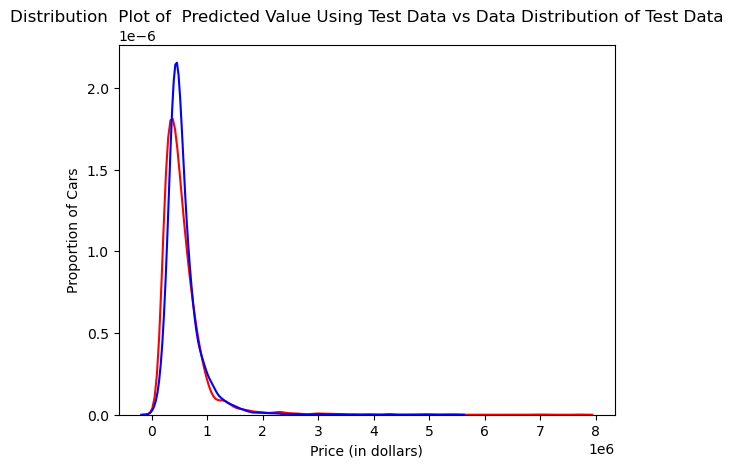

In [141]:
yhat_test = pipe.predict(x_test)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

### Model 3

We create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the $R^2$ using the test data.


In [142]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train,y_train)
RidgeModel.score(x_test,y_test)

0.6459152254891415

### Model 4

We perform a second order polynomial transform on both the training data and testing data. Then we create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the $R^2$ utilising the test data provided. 


In [143]:
polynomial_ridge_model = Pipeline([
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge(alpha=0.1))  
])

polynomial_ridge_model.fit(x_train,y_train)
polynomial_ridge_model.score(x_test,y_test)

0.7543633737700637

#### Refining Ridge Model (Grid Search)

In [144]:
# Create a pipeline with polynomial feature transformation and Ridge regression
pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge())
])

# Specify the hyperparameter search space, including both the polynomial degree and Ridge alpha
param_grid = {
    'poly__degree': [2, 3, 4],
    'ridge__alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]
}

# Perform grid search with 4-fold cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=4)

# Fit the GridSearchCV object on the training data
grid_search.fit(x_train, y_train)


C:\Users\omarg\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.18328e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\omarg\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.10993e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\omarg\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.95152e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\omarg\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.25605e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'poly__degree': [2, 3, 4],
                         'ridge__alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000,
                                          100000, 100000]})

In [145]:
BestRR=grid_search.best_estimator_
BestRR

Pipeline(steps=[('poly', PolynomialFeatures()), ('ridge', Ridge(alpha=0.001))])

In [146]:
BestRR.score(x_test,y_test)

0.7601087378296834

Lets visualize how well this model performs

In [147]:
yhat_test = BestRR.predict(x_test)

In [148]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

C:\Users\omarg\AppData\Local\Temp\ipykernel_24268\1129970094.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\omarg\AppData\Local\Temp\ipykernel_24268\1129970094.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sn

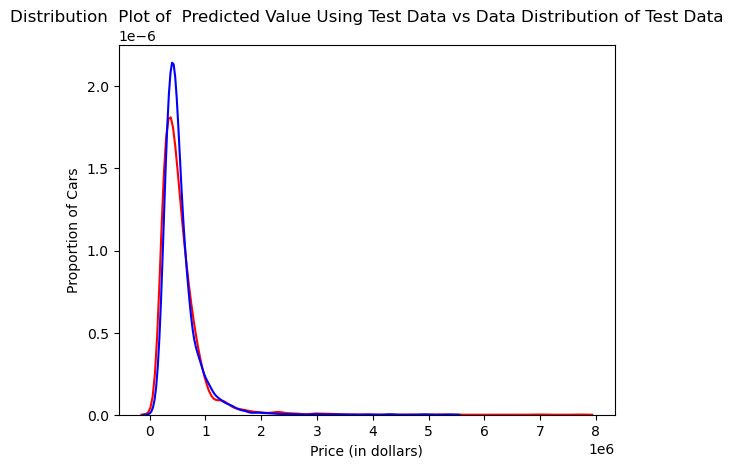

In [149]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

The model that seems to be the best is The refined Model 4 where alpha = 0.001 and degree of the polynomial is 2 with a $R^2$ of 0.7601.

This is not too far off from the polynomial model we created, that one has an $R^2$ value of 0.7599

Let us do a cross validation and see how well the 

In [153]:
# Performing cross-validation on both models and calculating their respective performance metrics (e.g., R-squared)
linear_scores = cross_val_score(lm2, x_train, y_train, cv=5, scoring='r2')
polynomial_scores = cross_val_score(polynomial_model, x_train, y_train, cv=5, scoring='r2')
polynomial_ridge_scores = cross_val_score(polynomial_ridge_model, x_train, y_train, cv=5, scoring='r2')


# Calculating the average R-squared scores for all models
linear_avg_score = np.mean(linear_scores)
polynomial_avg_score = np.mean(polynomial_scores)
polynomial_ridge_avg_score = np.mean(polynomial_ridge_scores)

print("Linear model average R-squared score:", linear_avg_score)
print("Polynomial model average R-squared score:", polynomial_avg_score)
print("Polynomial model with Ridge regression average R-squared score:", polynomial_ridge_avg_score)


# Comparing the performance metrics of all models
best_model = np.argmax([linear_avg_score, polynomial_avg_score, polynomial_ridge_avg_score])
model_names = ["Linear model", "Polynomial model", "Polynomial model with Ridge regression"]
print("Best performing model:", model_names[best_model])

Linear model average R-squared score: 0.6599272566232941
Polynomial model average R-squared score: 0.733126317752854
Polynomial model with Ridge regression average R-squared score: 0.7193894646917124
Best performing model: Polynomial model


# Conclusion

Using cross validation on the training data we can see that unlike what we originally thought, the Polynomial Model seems to be the best performing model